In [1]:
import sys
!{sys.executable} -m pip install opencv-python

import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import cv2  
from scipy.ndimage import uniform_filter


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

# Filtre guidé
def guided_filter(I, p, r, eps):
    """
    I : image guide
    p : image à filtrer
    r : rayon de la fenêtre
    eps : paramètre de régularisation
    """
    mean_I = uniform_filter(I, size=(2 * r + 1))
    mean_p = uniform_filter(p, size=(2 * r + 1))
    mean_Ip = uniform_filter(I * p, size=(2 * r + 1))
    cov_Ip = mean_Ip - mean_I * mean_p  # covariance de I et p

    mean_II = uniform_filter(I * I, size=(2 * r + 1))
    var_I = mean_II - mean_I * mean_I  # variance de I

    a = cov_Ip / (var_I + eps)  # coefficient a
    b = mean_p - a * mean_I     # coefficient b

    mean_a = uniform_filter(a, size=(2 * r + 1))
    mean_b = uniform_filter(b, size=(2 * r + 1))

    q = mean_a * I + mean_b  # image filtrée
    return q

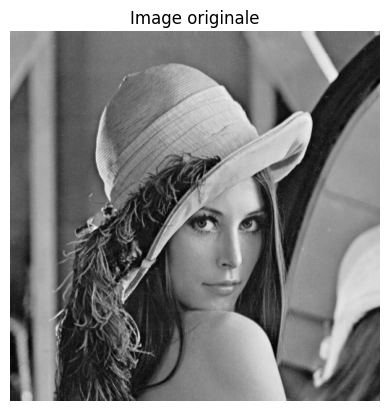

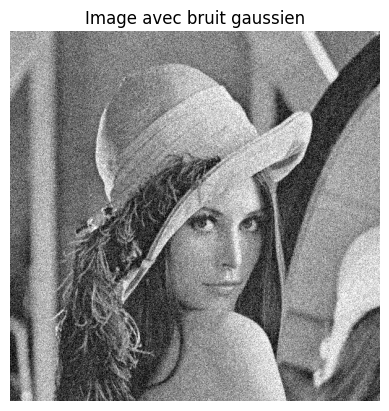

PSNR entre l'image originale et l'image bruitée :  20.063130992091303
PSNR avec eps=0.01 : 23.84
PSNR avec eps=0.02 : 25.15
PSNR avec eps=0.05 : 25.20
PSNR avec eps=0.1 : 24.23
PSNR avec eps=0.2 : 23.28
PSNR avec eps=0.3 : 22.87


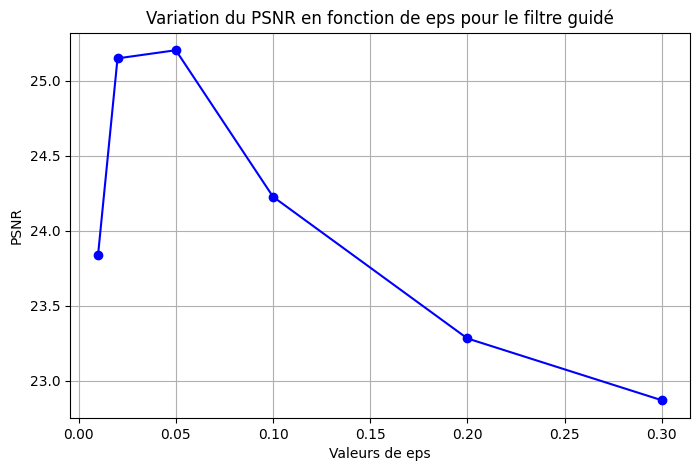

In [5]:
image = io.imread("lena.pgm", as_gray=True)
display_image(image, "Image originale")


image = image / 255.0


noise_variance = 0.01
image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
image_noised = np.clip(image_noised, 0, 1)
display_image(image_noised, 'Image avec bruit gaussien')

psnr_originale_bruitee = psnr(image * 255, image_noised * 255)
print("PSNR entre l'image originale et l'image bruitée : ", psnr_originale_bruitee)

eps_values = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3]  
psnr_values = []
r = 8  

for eps in eps_values:
    image_filtree = guided_filter(image_noised, image_noised, r, eps)

    psnr_val = psnr(image * 255, image_filtree * 255)
    psnr_values.append(psnr_val)
    print(f"PSNR avec eps={eps} : {psnr_val:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(eps_values, psnr_values, marker='o', linestyle='-', color='b')
plt.xlabel("Valeurs de eps")
plt.ylabel("PSNR")
plt.title("Variation du PSNR en fonction de eps pour le filtre guidé")
plt.grid()
plt.show()
